# Problem Set 2, due January 23th at 5:30 pm/January 24th 3:30pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

In [1]:
#Name: Shuyang Wu
#Date: 1/20/2017
#Section: C
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf
import os
import scipy.stats as stats
%matplotlib inline

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [4]:
p_df = pd.read_csv('~/Downloads/progresa_sample.csv', dtype={'progresa': str})
p_df['progresa'] = p_df['progresa'].astype('str') 
print(p_df.shape[0], "observations and", p_df.shape[1], "variables")
print("poor levels", p_df['poor'].unique())
summary = p_df.describe().loc[['mean','std']]
summary.drop(['year','folnum','village'], axis=1, inplace=True)
summary.sort_index(axis=1)

77250 observations and 21 variables
poor levels ['pobre' 'no pobre']


,age,dist_cap,dist_sec,fam_n,grc,grc97,hohage,hohedu,hohsex,hohwag,indig,min_dist,sc,sc97,sex,welfare_index
mean,11.366460,147.674452,2.418910,7.215715,3.963537,3.705372,44.436717,2.768104,0.925185,586.985312,0.298324,103.447520,0.819818,0.813922,0.512211,690.346564
std,3.167744,76.063134,2.234109,2.352900,2.499063,2.572387,11.620372,2.656106,0.263095,788.133664,0.457525,42.089441,0.384342,0.389172,0.499854,139.491130


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [8]:
baseline = p_df.loc[(p_df.year == 97) & (p_df.poor == 'pobre'),]
bl_treat = baseline.loc[baseline.progresa == "basal"].dropna()
bl_control = baseline.loc[baseline.progresa == "0"].dropna()
#print(bl_control.dtypes)
#drop string containing columns
bl_treat.drop(['year','poor','progresa'], axis=1, inplace=True)
bl_control.drop(['year','poor','progresa'], axis=1, inplace=True)
mtreat = bl_treat.mean()
mcontrol = bl_control.mean()
diff = bl_treat.mean() - bl_control.mean()
output = pd.concat([mtreat, mcontrol, diff], axis=1).reset_index()
output.rename(columns={'index': 'Variable name', 0: 'Average value (Treatment villages)', 
                       1: 'Average value (Control villages)', 2: "Difference(Treat - Control)"}, inplace=True)
diff_p = []
for column in bl_control:
    __, p_value = ttest_ind(bl_treat[column], bl_control[column])
    diff_p.append({'p-value': p_value})
diff_p = pd.DataFrame(diff_p)
final_output = pd.concat([output, diff_p], axis=1)
pd.concat([output, diff_p], axis=1)

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference(Treat - Control),p-value
0,sex,0.520268,0.506556,0.013713,1.956962e-02
1,indig,0.316744,0.325306,-0.008562,1.183760e-01
2,dist_sec,2.399648,2.400687,-0.001039,9.670949e-01
3,sc,0.822697,0.815066,0.007631,9.117959e-02
4,grc,3.709214,3.733653,-0.024439,3.947750e-01
5,fam_n,7.281032,7.302939,-0.021907,4.236088e-01
6,min_dist,107.395231,103.098348,4.296884,1.936661e-18
7,dist_cap,151.801472,154.492095,-2.690622,3.414194e-03
8,hohedu,2.726729,2.660982,0.065747,2.613239e-02
9,hohwag,550.207086,580.694452,-30.487366,2.727661e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 

There were statistically significant differences between treatment and control villages as baseline. specifically, sex, nearest distance to a secondary school, min distance to the capital, years of schooling of head of household, monthly wages of head of household, welfare index used to classify poor and age of head of household.

* B: Why does it matter if there are differences at baseline?

Differences at baseline could affect the differences measured at the end of the study.

* C: What does this imply about how to measure the impact of the treatment?

When measuring the impact of the treatment, one must substract the original differences between the treatment and control groups to make a conclusion of significance.

In [47]:
#show statistically significant variables
final_output.loc[final_output.iloc[:,-1]<= 0.05]

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference(Treat - Control),p-value
0,sex,0.520268,0.506556,0.013713,1.956962e-02
6,min_dist,107.395231,103.098348,4.296884,1.936661e-18
7,dist_cap,151.801472,154.492095,-2.690622,3.414194e-03
8,hohedu,2.726729,2.660982,0.065747,2.613239e-02
9,hohwag,550.207086,580.694452,-30.487366,2.727661e-04
10,welfare_index,656.810476,661.593513,-4.783037,3.724043e-04
12,hohage,43.631234,44.270717,-0.639483,1.925767e-06
14,village,236.520636,289.078756,-52.558120,8.322183e-196


### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

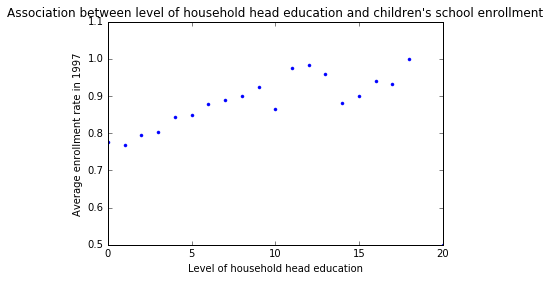

In [48]:
edu = p_df.loc[(p_df.year == 97)].groupby(p_df['hohedu']).sc.mean()
plt.plot(edu, '.')
plt.xlabel('Level of household head education')
plt.ylabel('Average enrollment rate in 1997')
plt.title("Association between level of household head education and children's school enrollment")
plt.show()

There seem to be a positive association between the level of household head education and the average school enrollment rate of that level.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

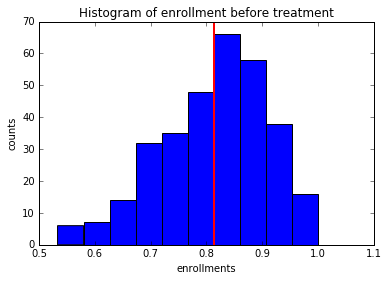

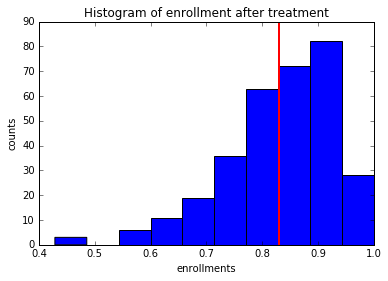

Average enrollment rates before treatment: 0.8138394110596501
Average enrollment rates after treatment: 0.8295362042630732


Ttest_indResult(statistic=-2.0157134865156379, pvalue=0.04424870036572115)

In [49]:
v97 = p_df.loc[(p_df.year == 97)&(p_df.poor == 'pobre')&
               (p_df.progresa == "basal"),].groupby('village').mean()
v97.reset_index(level=0, inplace = True)
plt.hist(v97['sc'])
plt.xlabel('enrollments')
plt.ylabel('counts')
plt.title('Histogram of enrollment before treatment')
plt.axvline(v97['sc'].mean(), color = 'red', linewidth = 2)
plt.show()

v98 = p_df.loc[(p_df.year == 98)&(p_df.poor == 'pobre')&
            (p_df.progresa == "basal"),].groupby('village').mean()
v98.reset_index(level=0, inplace = True)
plt.hist(v98['sc'])
plt.xlabel('enrollments')
plt.ylabel('counts')
plt.title('Histogram of enrollment after treatment')
plt.axvline(v98['sc'].mean(), color = 'red', linewidth = 2)
plt.show()

print("Average enrollment rates before treatment:", v97['sc'].mean())
print("Average enrollment rates after treatment:", v98['sc'].mean())
ttest_ind(v97['sc'].dropna(), v98['sc'].dropna())

There appear to be a small difference between the average enrollment rates before and after treatments (0.813 and 0.829). The histograms show a difference in distributions of the enrollment rates, specifically, probability of having an over 0.8 enrollment rate is higher after treatment comparing to before. T test and the p-value suggests a statistically significant difference before and after treatment. p = 0.044 < 0.05.

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [50]:
treatment = p_df.loc[(p_df.year == 98)&(p_df.poor == 'pobre')&(p_df.progresa == "basal"),].sc.dropna()
control = p_df.loc[(p_df.year == 98)&(p_df.poor == 'pobre')&(p_df.progresa == '0'),].sc.dropna()
print("Average enrollment rate among poor households in the Treatment villages: ", treatment.mean(),
      "\n", "Average enrollment rate among poor households in the control villages", control.mean())
ttest_ind(treatment, control)

Average enrollment rate among poor households in the Treatment villages:  0.8464791213954308 
 Average enrollment rate among poor households in the control villages 0.807636956730308


Ttest_indResult(statistic=8.3587205674183735, pvalue=6.636344447523235e-17)

T-test suggest that the difference is statistically significant, given a p-value smaller than 0.05. This means that the treatment is effective at improving the enrollment rate among poor households in the villages.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [51]:
poor98 = p_df.loc[(p_df.year == 98)&(p_df.poor == 'pobre'),].dropna()
poor98.progresa = (poor98['progresa'] == "basal").astype(int)
pro = poor98.progresa.reshape(len(poor98.progresa), 1)

simplergs = smf.ols(formula='sc ~ progresa', data=poor98).fit()
print(simplergs.params)
print(simplergs.summary())

Intercept    0.810923
progresa     0.038334
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Thu, 26 Jan 2017   Prob (F-statistic):           5.66e-16
Time:                        13:19:56   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------

Based on the regression model, Progresa increases the likelihood of a child enrolling in school by 0.038. 

The regression estimate agrees with the t-test estimate from part 2.1, which is a increase of 0.039 in child enrolling after treatment.

From the regression model, we can reject the null hypothesis that the treatment effects are zero because the F statistic (Prob (F-statistic): the probability that the results happened by chance) is 5.66e-16 << 0.05. Meaning that the difference in means between the two groups are statistically significant.

The counterfactual assumption underlying this regression is that without treatment the children enrollment rate would not have changed comparing to the control group.


### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [52]:
multirgs = smf.ols(formula='sc ~ progresa + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohwag + welfare_index + age + hohage', data=poor98).fit()
multirgs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     799.3
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        13:19:56   Log-Likelihood:                -7116.6
No. Observations:               26155   AIC:                         1.426e+04
Df Residuals:                   26142   BIC:                         1.437e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.4445      0.018     79.445      0.000         1.409     1.480
progresa          0.0333      0.004      8.163      0.000         0.025     0.041
sex               0.0303      0.004      7.712      0.000         0.023     0.038
indig             0.0223      0.005      4.606      0.000         0.013     0.032
dist_sec         -0.0097      0.001    -10.363      0.000        -0.012    -0.008
fam_n             0.0005      0.001      0.527      0.598        -0.001     0.002
min_dist          0.0004   6.48e-05      6.471      0.000         0.000     0.001
dist_cap          0.0002   3.75e-05      4.907      0.000         0.000     0.000
hohedu            0.0076      0.001      8.678      0.000         0.006     0.009
hohwag        -2.093e-06   2.84e-06     -0.738      0.460     -7.65e-06  3.46e-06
welfare_index  1.934e-05   1.85e-05      1.046      0.296     -1.69e-05  5.56e-05
age              -0.0652      0.001    -91.876      0.000        -0.067    -0.064
hohage        -2.586e-07      0.000     -0.001      0.999        -0.000     0.000
==============================================================================
Omnibus:                     2967.096   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4084.880
Skew:                          -0.958   Prob(JB):                         0.00
Kurtosis:                       3.280   Cond. No.                     9.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


The controls decreased the point estimate of treatment effect from 0.038 to 0.033, and standard error of the point estimate from 0.05 to 0.04. Smaller standard error indicates more precise measure of the point estimate. Besides the changes in treatment effect, multivariate regression model has a better fit (R square value being 0.268 versus 0.003.
It also has a relatively large increase in the intercept, from 0.81 to 1.44. Some of the control variables also had statistically significant effect on the enrollment rate, however the effects are minimal based on the coefficients. With the controls, the most prominent effect is still from the treatment, but the model has better fit and the point estimate of the treatment effect now has a smaller confidence interval. Therefore, adding the controls probably ruled out the noises in the treatment effect when it was the only predictor and left us with higher accuracy and precision.


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [53]:
treatment97 = p_df.loc[(p_df.year == 97)&(p_df.poor == 'pobre')&(p_df.progresa == "basal"),].sc.dropna()
treatment98 = p_df.loc[(p_df.year == 98)&(p_df.poor == 'pobre')&(p_df.progresa == "basal"),].sc.dropna()
treat_effect = treatment98.mean() - treatment97.mean()

control97 = p_df.loc[(p_df.year == 97)&(p_df.poor == 'pobre')&(p_df.progresa == "0"),].sc.dropna()
control98 = p_df.loc[(p_df.year == 98)&(p_df.poor == 'pobre')&(p_df.progresa == "0"),].sc.dropna()
control_effect = control98.mean() - control97.mean()

diff_in_diff = treat_effect - control_effect
print(diff_in_diff)

0.031331280319323085


The estimate of the impact is 0.031. It is lower than the result from the earlier simple difference methods (0.038).

The counterfactual assumption underlying this estimate is that the change over time (97 to 98) in both groups would have been the same without the treatment.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [54]:
p_df.loc[p_df['poor'] == 'pobre', 'poor'] = 1
p_df.loc[p_df['poor'] ==  'no pobre', 'poor'] = 0
pd.to_numeric(p_df['poor'])
p_poor = p_df[p_df['poor'] == 1]
p_poor.loc[p_poor.year == 97, 'time'] = 0
p_poor.loc[p_poor.year == 98, 'time'] = 1
p_poor.progresa = (p_poor['progresa'] == "basal").astype(int)
ddrgs = smf.ols(formula = 'sc ~ progresa + time + progresa:time + sex + dist_sec  + min_dist + dist_cap + hohedu + age + hohage', data=p_poor).fit()
ddrgs.summary()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     2296.
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        13:19:56   Log-Likelihood:                -16585.
No. Observations:               58344   AIC:                         3.319e+04
Df Residuals:                   58333   BIC:                         3.329e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.4215      0.009    158.822      0.000         1.404     1.439
progresa          0.0031      0.004      0.817      0.414        -0.004     0.010
time              0.0274      0.004      6.321      0.000         0.019     0.036
progresa:time     0.0313      0.005      5.690      0.000         0.020     0.042
sex               0.0331      0.003     12.429      0.000         0.028     0.038
dist_sec         -0.0093      0.001    -15.020      0.000        -0.010    -0.008
min_dist          0.0004   4.37e-05      8.550      0.000         0.000     0.000
dist_cap          0.0003   2.36e-05     10.821      0.000         0.000     0.000
hohedu            0.0072      0.001     12.322      0.000         0.006     0.008
age              -0.0657      0.000   -143.888      0.000        -0.067    -0.065
hohage            0.0002      0.000      1.838      0.066     -1.58e-05     0.000
==============================================================================
Omnibus:                     5488.522   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7205.368
Skew:                          -0.859   Prob(JB):                         0.00
Kurtosis:                       3.110   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.

The estimate of the impact of Progresa is 0.0031, with standard error on 0.004, meaning it's not statistically significant. The estimate of the effect of both Progresa and the year after treatment is 0.0313, with a standard error of 0.005, statistically significant. In other words, after treatment in 1998 there is a statistically significant improvement of enrollment rate of 3.13%. The effect of time (being in 1998) alone has a estimate of 0.0274 with an standard error of 0.04, statistically signifcant. This means the enrollment rate is higher in 1998 than in 1997 by 2.74% despite of progresa.


How do these estimates of the treatment effect compare to the estimates based on the simple difference?

These estimates of the treatment effect are lower compare to the estimates based on the simple difference.(0.0031 vs. 0.038) Probably because the counterfactual assumption underlying the latter estimate is not satisfied, that without treatment the children enrollment rate would not have changed comparing to the control group.

How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?

The estimate of effect from progresa is smaller comparing to the difference-in-difference estimates from 2.4. The estimate of effect from both progresa and time is similar to the difference-in-difference estimates from 2.4. This means that the differences in estimates are caused by accounting for the interactions between progresa and time. Without looking at them separately, the sole effect of progresa was not calculated.

What is the counterfactual assumption underlying this regression?

The counterfactual assumption underlying this regression is that the enrollment rate in both groups would have been the same in the same year without treatment.

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [55]:
p_98 = p_df[p_df['year'] == 98]
p_98.loc[p_98.year == 97, 'time'] = 0
p_98.loc[p_98.year == 98, 'time'] = 1
p_98.progresa = (p_98['progresa'] == "basal").astype(int)
ddrgs2 = smf.ols(formula = 'sc ~ progresa + time + progresa:poor + poor + sex + dist_sec  + min_dist + dist_cap + hohedu + age', data=p_98).fit()
ddrgs2.summary()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1344.
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        13:19:57   Log-Likelihood:                -9237.3
No. Observations:               32097   AIC:                         1.849e+04
Df Residuals:                   32087   BIC:                         1.858e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.7408      0.006    122.903      0.000         0.729     0.753
poor[T.1]             -0.0211      0.008     -2.558      0.011        -0.037    -0.005
progresa               0.0250      0.010      2.583      0.010         0.006     0.044
progresa:poor[T.1]     0.0094      0.010      0.894      0.371        -0.011     0.030
time                   0.7408      0.006    122.903      0.000         0.729     0.753
sex                    0.0306      0.004      8.493      0.000         0.024     0.038
dist_sec              -0.0105      0.001    -12.741      0.000        -0.012    -0.009
min_dist               0.0003   5.92e-05      5.736      0.000         0.000     0.000
dist_cap               0.0003   3.28e-05      9.368      0.000         0.000     0.000
hohedu                 0.0085      0.001     12.210      0.000         0.007     0.010
age                   -0.0661      0.001   -103.966      0.000        -0.067    -0.065
==============================================================================
Omnibus:                     3179.660   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4231.906
Skew:                          -0.888   Prob(JB):                         0.00
Kurtosis:                       3.111   Cond. No.                     8.02e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

How would we estimate this version of the treatment effects in a regression model?

The coefficient for progresa is 0.025 with standard error of 0.01 which mean the enrollment rate in the treatment group is statistically significantly higher than the control. The coefficient for poor Poor' coefficient value is -0.02 with standard error of 0.008 which indicates poor household have lower enrollment rates comparing to the non-poor households, statistically significant. The estimate of the interaction between progresa and poor is 0.0094, wth a standard error of 0.01, but not statistically significant.

What is the counterfactual assumption underlying this regression?

The counterfactual assumption underlying this regression model is that the enrollment rates between poor and non-poor households remains the same without the treatment.

How do these treatment effects compare to the estimates above?

The treatment effects of progresa on poor households in 1998 can be calculated by adding the coefficients separately,  progresa 0.0250 - poor 0.0211 + progresa and poor 0.0094 =  0.013. This is smaller than the estimate above, 0.0313.

Discuss some possible explanations for differences or similarities

The experiment was desgined that only the poor household get to benefits from the treatment, and this regression model does not capture that. Being poor probably had less effect on the outcome because non-poors are not enrolled in the treatment group. I think the differences can be explained by the non-optimal representation of the data.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [56]:
p_nonpoor = p_df[p_df['poor'] == 0]
p_nonpoor.loc[p_nonpoor.year == 97, 'time'] = 0
p_nonpoor.loc[p_nonpoor.year == 98, 'time'] = 1
nprgs = smf.ols(formula = 'sc ~ progresa + time + progresa:time + sex + dist_sec  + min_dist + dist_cap + hohedu + age + hohage', data=p_nonpoor).fit()
nprgs.summary()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     428.9
Date:                Thu, 26 Jan 2017   Prob (F-statistic):               0.00
Time:                        13:19:58   Log-Likelihood:                -3659.7
No. Observations:               10423   AIC:                             7341.
Df Residuals:                   10412   BIC:                             7421.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  1.4739      0.024     61.795      0.000         1.427     1.521
progresa[T.basal]          0.0249      0.009      2.692      0.007         0.007     0.043
time                       0.0387      0.011      3.600      0.000         0.018     0.060
progresa[T.basal]:time    -0.0027      0.014     -0.194      0.846        -0.030     0.024
sex                        0.0310      0.007      4.595      0.000         0.018     0.044
dist_sec                  -0.0154      0.002     -8.730      0.000        -0.019    -0.012
min_dist               -7.307e-05      0.000     -0.632      0.527        -0.000     0.000
dist_cap                   0.0006   7.47e-05      8.638      0.000         0.000     0.001
hohedu                     0.0091      0.001      7.645      0.000         0.007     0.011
age                       -0.0685      0.001    -60.095      0.000        -0.071    -0.066
hohage                  6.824e-05      0.000      0.203      0.839        -0.001     0.001
==============================================================================
Omnibus:                      845.143   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.020
Skew:                          -0.618   Prob(JB):                    6.98e-175
Kurtosis:                       2.437   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yes, there are statistically significant impacts of progresa on the non-poor households, the average enrollment rate is 0.0249 higher with progresa than without.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

I don't think Progresa alone had causal impact on the enrollment rates of poor households in Mexico. Because a lot of the assumptions seems not met. The two groups had difference from the begining and their enrollment rates seem to progress differently over time (time played more role in improving the enrollment rates in the treatment group rather than Progresa). Either way, I don't think a solid conclusion can be made regarding the causal impact of Progresa on enrollment rates.